In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Exercise 1

In [45]:
def get_column(data, index):

    # your code here ****************************
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    Y = sales_data

    return X, Y


In [46]:
# Multiple choice question
# Question 1
X, y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list) 


[624.1, 175.1, 300.5, 78.9]


### Exercise 2

In [82]:
def initialize_parameters(mode = 'random'):
    if mode == 'random':
        w1 = random.gauss(mu = 0, sigma = 0.01)
        w2 = random.gauss(mu = 0, sigma = 0.01)
        w3 = random.gauss(mu = 0, sigma = 0.01)
        b = 0
    elif mode == 'default1':
        w1 = 0.016992259082509283 
        w2 = 0.0070783670518262355 
        w3 = -0.002307860847821344 
        b = 0
    elif mode == 'default2':
        w1 = -0.01268850433497871 
        w2 = 0.004752496982185252 
        w3 = 0.0073796171538643845
        b = 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b


def compute_loss_mse(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
    return 2*xi*(y_hat - y)

def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(wi, dl_dwi, lr):
    return wi - lr*dl_dwi

def update_weight_b(b, dl_db, lr):
    return b - lr*dl_db


In [36]:
def implement_linear_regression(X_data, y_data, max_epoch = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_parameters(mode='default')
    N = len(y_data)

    for epoch in range(max_epoch):
        for i in range(N):
            #get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            #compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #compute loss
            loss = compute_loss_mse(y_hat, y)
            
            #compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b( y, y_hat)

            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)

    return losses, w1, w2, w3, b
    


In [50]:
#Multiple choice question
#Question 2
y_pred = predict(x1 = 1 ,x2 = 1 ,x3 = 1 ,w1 = 0 ,w2 = 0.5 ,w3 = 0 ,b = 0.5)
print(y_pred)


1.0


In [51]:
#Multiple choice question
#Question 3
l = compute_loss_mse(y_hat = 1 ,y = 0.5)
print(l)

0.25


In [52]:
#Multiple choice question
#Question 4

g_w1 = compute_gradient_wi(xi = 1 ,y = 1 ,y_hat = 0.5)
print(g_w1)


-1.0


In [53]:
#Multiple choice question
#Question 5

g_b = compute_gradient_b(y = 2 ,y_hat = 0.5)
print(g_b)


-3.0


In [54]:
#Multiple choice question
#Question 6

after_wi = update_weight_wi(wi = 1 ,dl_dwi = -0.5 ,lr = 1e-5)
print(after_wi)

1.000005


In [55]:
#Multiple choice question
#Question 7

after_b = update_weight_b(b = 0.5 ,dl_db = -1 ,lr = 1e-5)
print(after_b)

0.50001


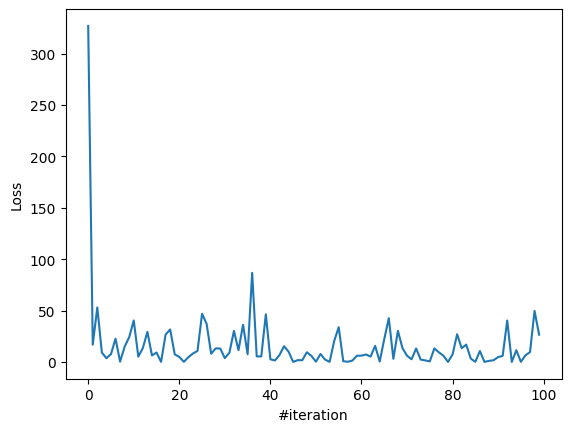

In [57]:
(losses, w1, w2, w3, b) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()



In [60]:
#Multiple choice question
#Question 8

X, y = prepare_data('advertising.csv')
(losses, w1, w2, w3, b) = implement_linear_regression(X, y)
print(np.round(w1, 3), np.round(w2, 3), np.round(w3, 3))


0.074 0.159 0.018


In [61]:
#Multiple choice question
#Question 9

#given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('advertising.csv')
(losses, w1, w2, w3, b) = implement_linear_regression(X, y)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f"Predicted sales is {sales}")


Predicted sales is 8.176413319549823


In [62]:
def compute_loss_mae(y_hat, y):
    return np.abs(y_hat - y)


In [63]:
#Multiple choice question
#Question 10

l = compute_loss_mae(y_hat = 1 ,y = 0.5)
print(l)

0.5


### Exercise 3

In [79]:
def implement_linear_regression_nsample(X_data, y_data, max_epoch = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_parameters(mode='default')
    N = len(y_data)

    for epoch in range(max_epoch):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        for i in range(N):
            #get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            #compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            #compute loss
            loss = compute_loss_mse(y_hat, y)

            # accumulate loss
            loss_total += loss

            #compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b( y, y_hat)

            # accumulate gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # ( after processing N samples ) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)

    return losses, w1, w2, w3, b

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

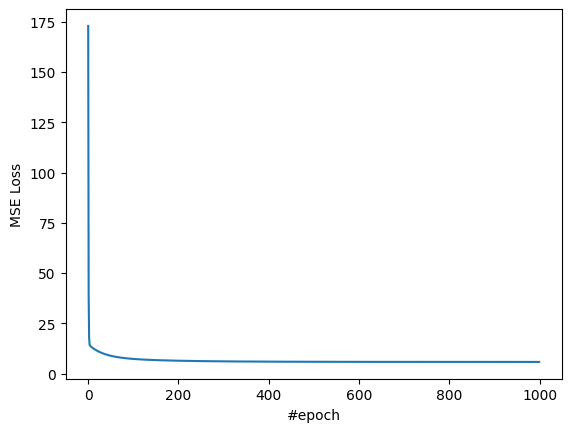

In [80]:
X, y = prepare_data("advertising.csv")
(losses, w1, w2, w3, b) = implement_linear_regression_nsample(X, y, max_epoch = 1000, lr = 1e-5)
print(losses)

plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()



In [81]:
#Multiple choice question
#Question 11
X, y = prepare_data("advertising.csv")
#using MSE loss
(losses, w1, w2, w3, b) = implement_linear_regression_nsample(X, y, max_epoch = 1000, lr = 1e-5)
print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


### Exercise 4

In [83]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3 ] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    Y = sales_data

    return X, Y

In [86]:
def predict(X_features, weights):
    return sum([x*w for x, w in zip(X_features, weights)])

def compute_loss(y_hat, y):
    
    return (y_hat - y)**2

def compute_gradient_w(X_features, y, y_hat):
    X_features = np.array(X_features)
    y = np.array(y)
    y_hat = np.array(y_hat)

    return 2*X_features*(y_hat - y)

def update_weight(weights, dl_dweights, lr ):
    weights = weights - lr*dl_dweights
    return weights


Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


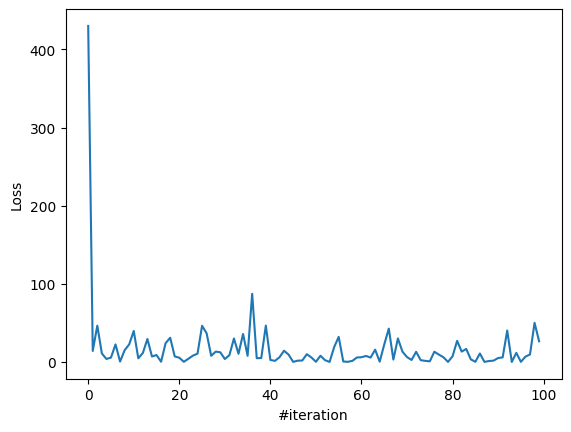

In [87]:
def implement_linear_regression(X_data, y_data, max_epoch = 50, lr = 1e-5):
    losses = []
    weights = initialize_parameters(mode='default2')
    N = len(y_data)

    for epoch in range(max_epoch):
        print(f"Epoch {epoch}")
        for i in range(N):
            features_i = X_data[i]
            y_i = y_data[i]

            y_hat = predict(features_i, weights)
            loss = compute_loss(y_hat, y_i)

            dl_dw = compute_gradient_w(features_i, y_i, y_hat)

            weights = update_weight(weights, dl_dw, lr)

            losses.append(loss)
    
    return losses, weights
            
X, y = prepare_data("advertising.csv")
(losses, weights) = implement_linear_regression(X, y, max_epoch = 1000, lr = 1e-5)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()


In [91]:
#Multiple choice question
#Question 12
X, y = prepare_data("advertising.csv")
#using MSE loss
(losses, weights) = implement_linear_regression(X, y, max_epoch = 50, lr = 1e-5)
# Print loss value at iteration 9999
print (losses[9999])

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
31.539519529444522
